# Tutorial 4

**Rémy BARBERET
Mélissa BUCZKO
Léo CHARDON
Mathilde CORRADI
Antoine COURCELLE
E5FI groupe 1I**

In [1]:
import os

import numpy as np
import wave
from scipy.io.wavfile import read
import matplotlib as mpl
import matplotlib.pyplot as plt

## Task 1

a)

In [2]:
def load_wav(file):
    input_data = read(file)
    audio = input_data[1]
    return audio, len(input_data[1])

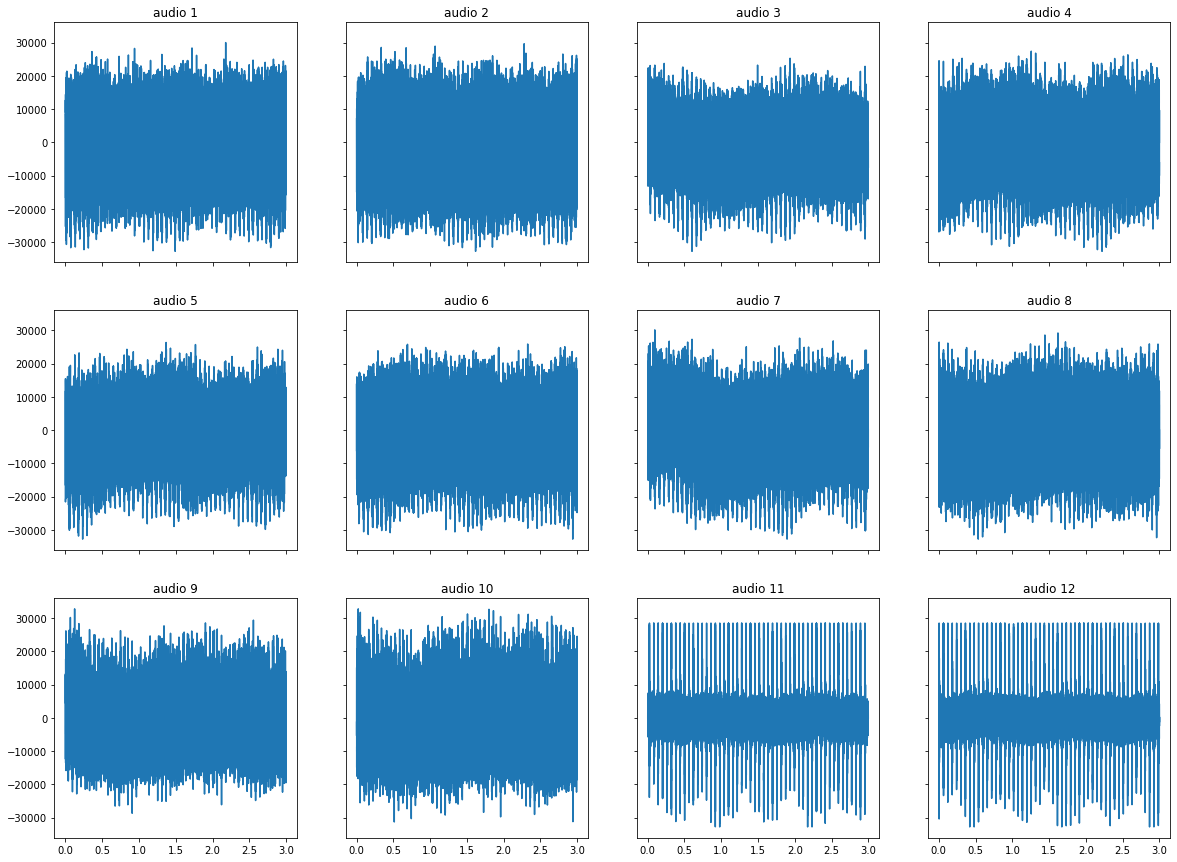

In [3]:
directory = "files"
data = list()
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    data.append(load_wav(f))

n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        axs[i, j].plot(np.linspace(0, 3, data[n][1]), data[n][0])
        axs[i, j].set_title(f"audio {n + 1}")
        n += 1

b)

Les premieres échantillons ont une amplitudes comprise entre -25000 et 25000.
Ensuite, les 2 derniers échantillons, on peut observer de nombreux IMPACTS et l'amplitude hors impact est très réduite.
On peut donc conclure que l'engrenage devient défaillant

c)

In [4]:
GMF = 330 
Z1 = 20
Z2 = 21
F1 = GMF / Z1
F2 = GMF / Z2
T1 = 1 / F1
T2 = 1 / F2
print(f"T1={T1}\nT2={T2}")

T1=0.06060606060606061
T2=0.06363636363636364


d)

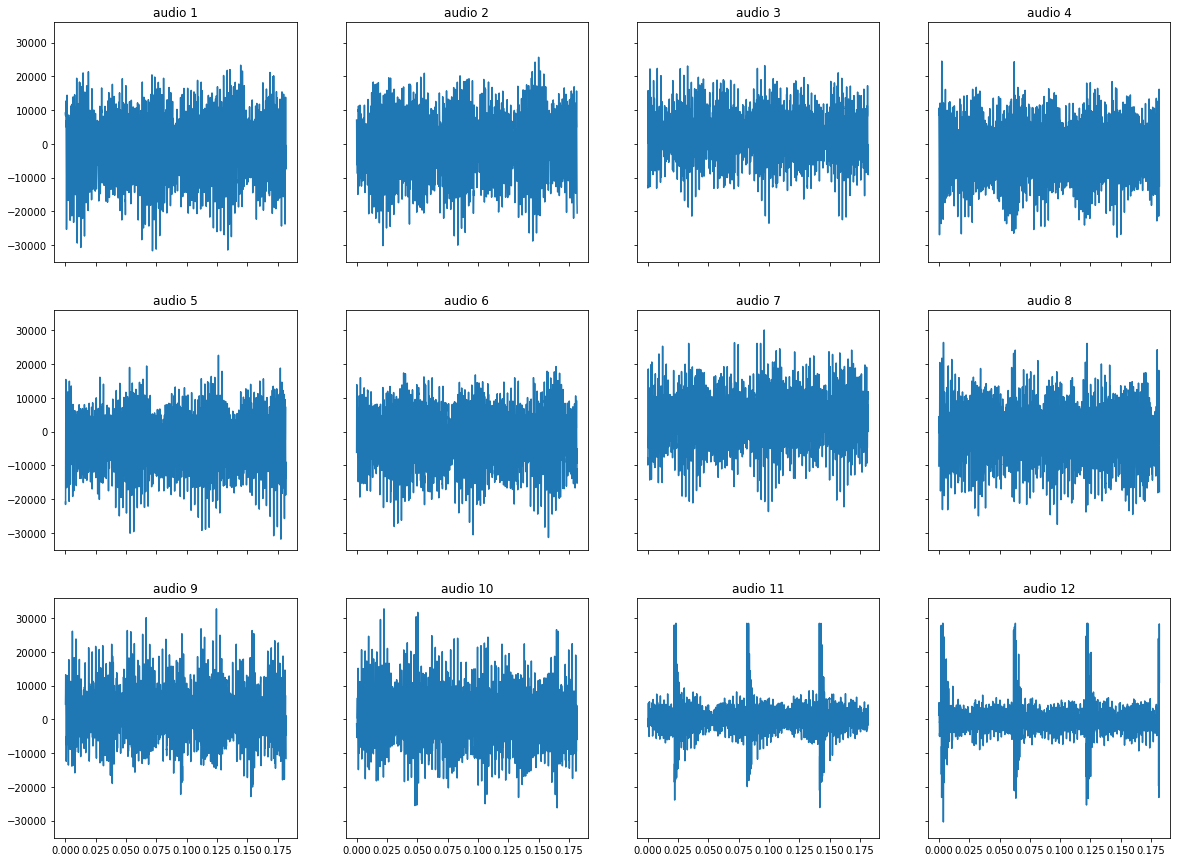

In [5]:
n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        nmax = int(3 * T1 * 20000)
        axs[i, j].plot(np.linspace(0, 3 * T1, nmax), data[n][0][0: nmax])
        axs[i, j].set_title(f"audio {n + 1}")
        n += 1

e) et f)

On voit qu'il y a des impacts (question f) qui apparaissent petit à petit à partir du 8ème enregistrement (question e).
Ensuite, le disfonctionnement se confirme à l'audio numéro 11 où on voit clairement les impacts.

## Task 2

a)

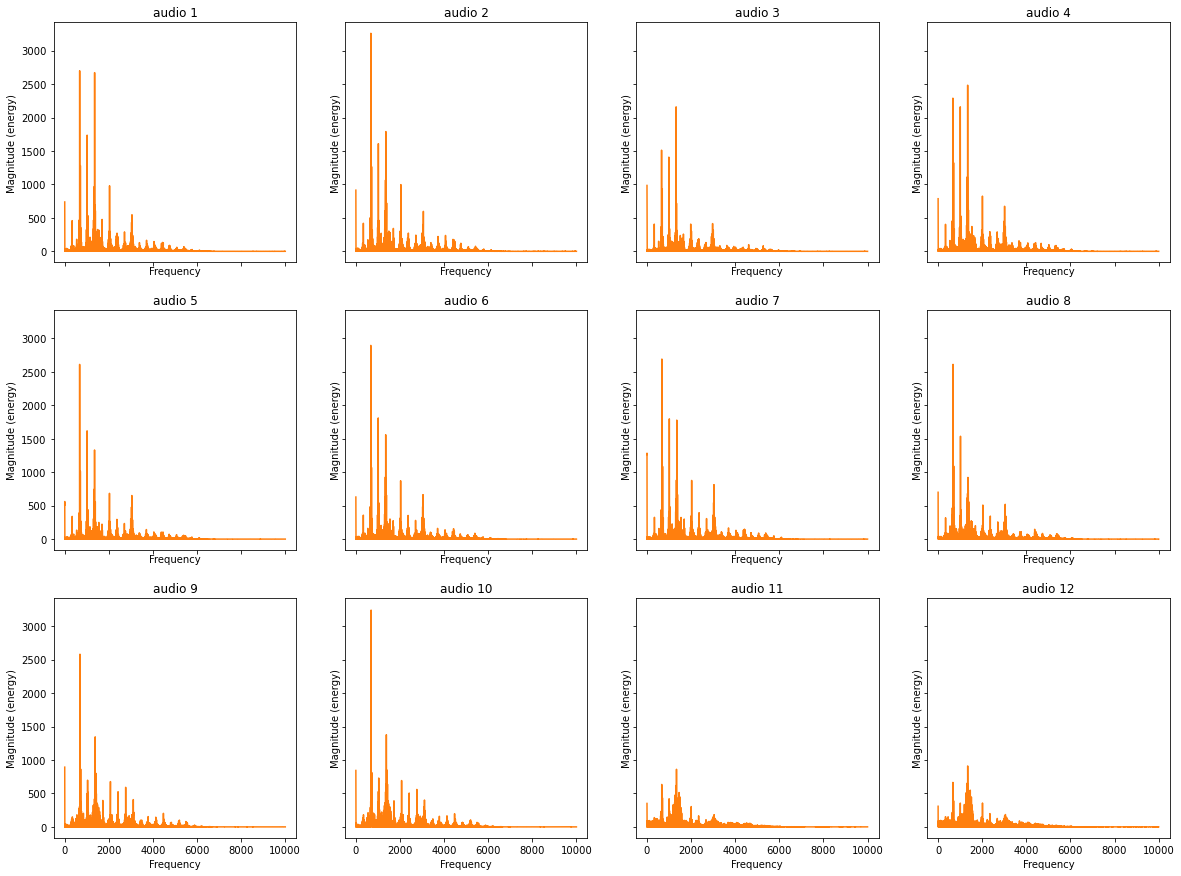

In [14]:
n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        axs[i, j].magnitude_spectrum(data[n][0], Fs=20000, color='C1')
        axs[i, j].set_title(f"audio {n + 1}")
        n += 1

On remarque qu'il y a une perte d'amplitude qui est particulièrement prononcée à partir de l'audio 11.

b)

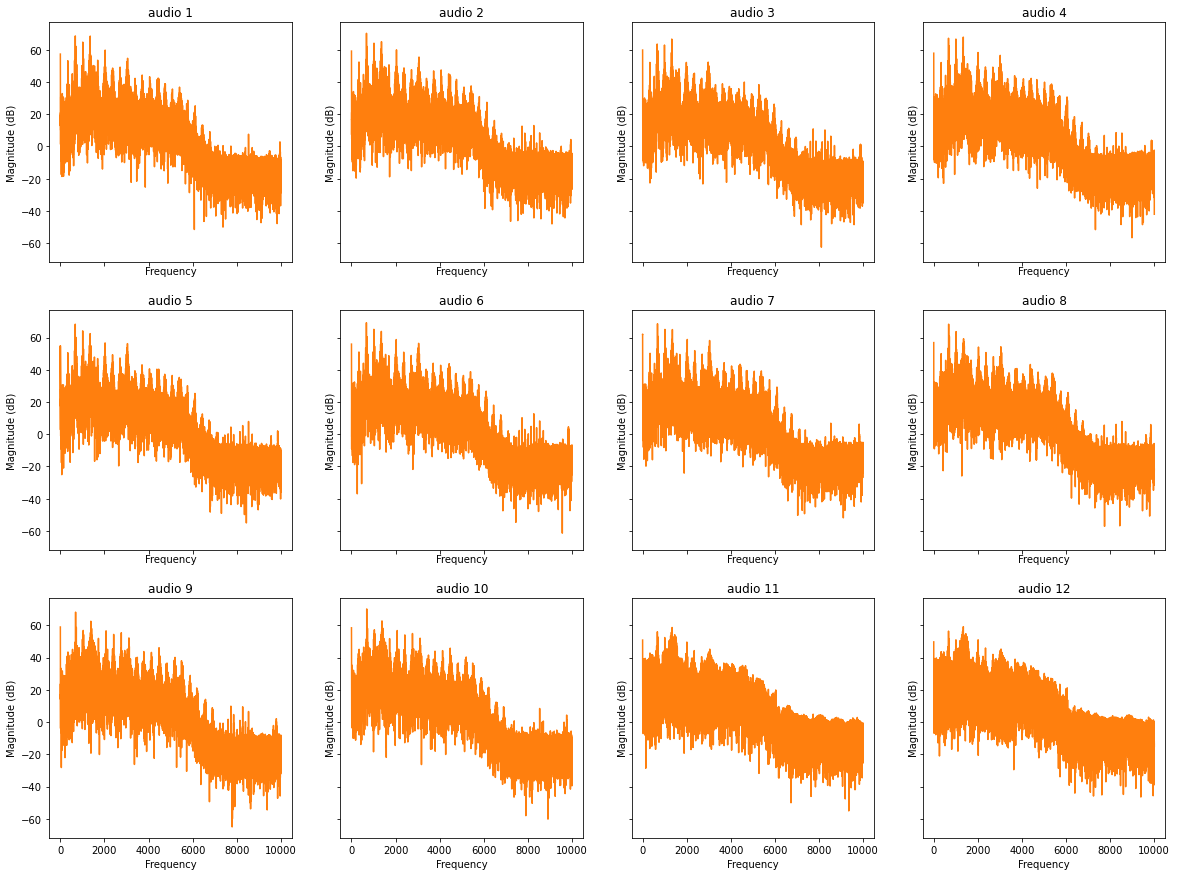

In [15]:
n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        #y = np.fft.fft(data[n][0])
        #magnitude = np.sqrt(y.real ** 2 + y.imag ** 2)
        #db = 20 * np.log10(np.abs(magnitude))
        #axs[i, j].plot(x, abs(db[0: 30000]))
        axs[i, j].magnitude_spectrum(data[n][0], Fs=20000, scale='dB', color='C1')
        axs[i, j].set_title(f"audio {n + 1}")
        n += 1

On remarque que le spectre en décibels s'applatit dans les fréquences supérieures à 6000Hz dans les audios 11 et 12 cependant, l'analyse spectrale de la question a) permet de mieux voir la défaillance. Cette analyse est utile lorsqu'on a un signal bruité.

c)

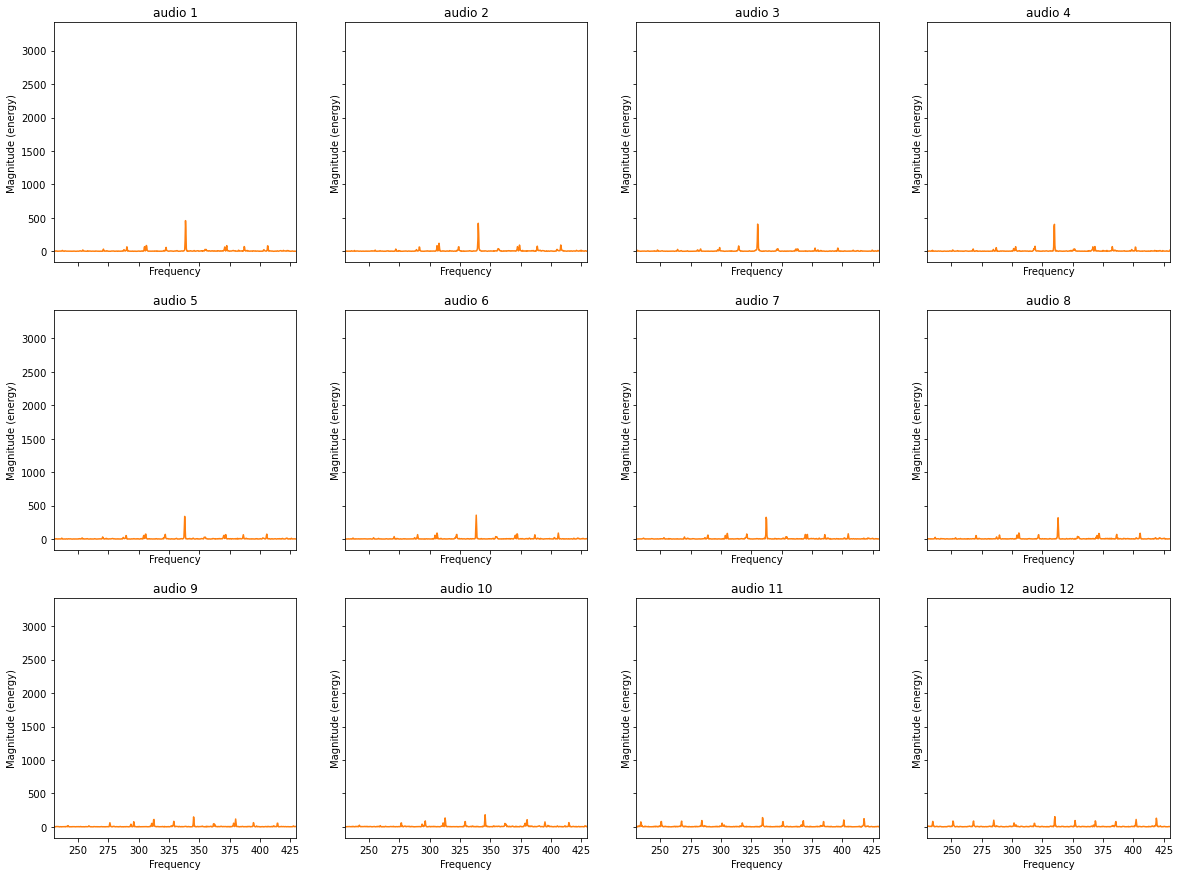

In [19]:
n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        axs[i, j].magnitude_spectrum(data[n][0], Fs=20000, color='C1')
        axs[i, j].set_title(f"audio {n + 1}")
        axs[i, j].set_xlim(230, 430) 
        n += 1

On observe sur les audios de 1 à 8 un pic aux alentours de la fréquence GMF (~330Hz) qui devient pratiquement imperceptible à partir de l'audio 9.

d)

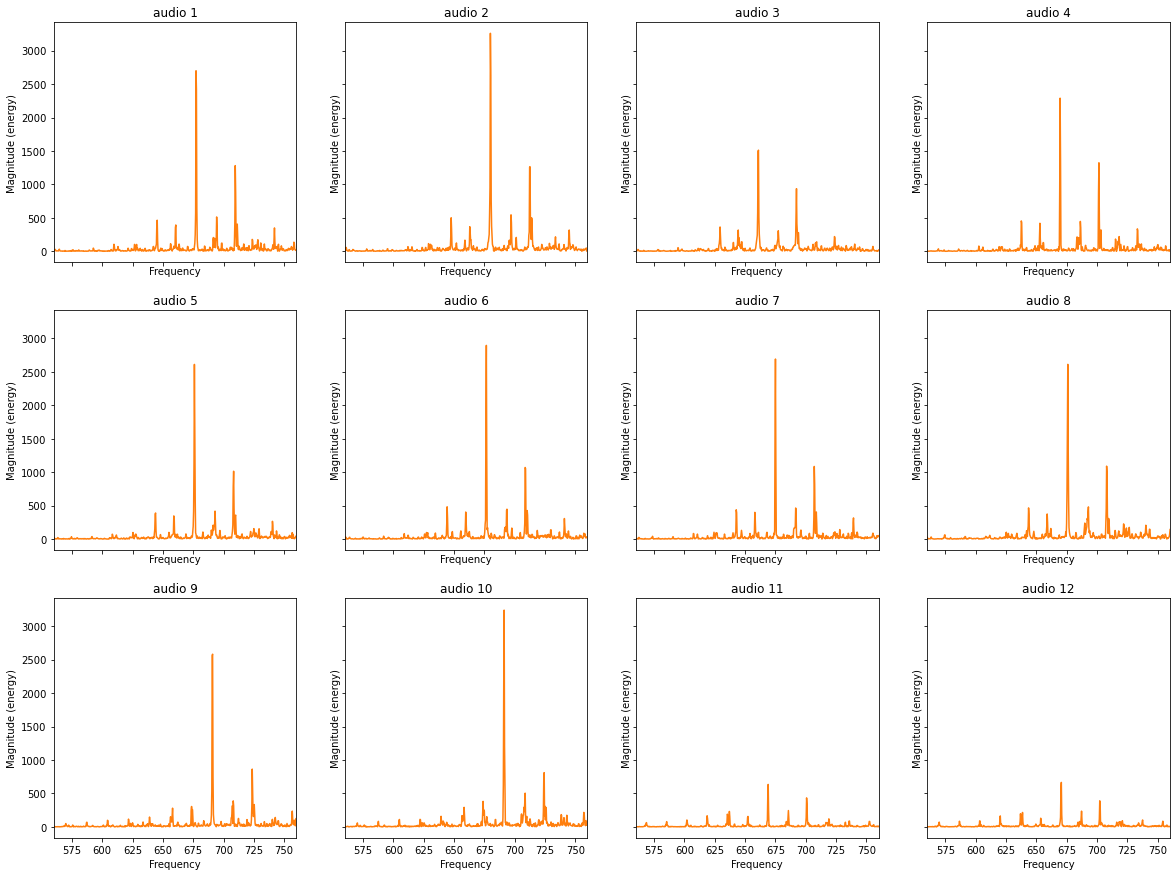

In [20]:
n = 0
fig, axs = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        axs[i, j].magnitude_spectrum(data[n][0], Fs=20000, color='C1')
        axs[i, j].set_title(f"audio {n + 1}")
        axs[i, j].set_xlim(560, 760) 
        n += 1

Nous observons des pics avec une amplitude élevée jusqu'à l'audio 10. Dans les audios 11 et 12, les pics ont perdu beaucoup d'amplitude. La défaillance se remarque 